# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento e limpeza de Dados</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

In [2]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data_raw = pd.read_csv("../dados/pib_mba_avaliacao2021.csv")
data = data_raw.copy()

Vamos utilizar uma base de dados baseada em informações de população e PIB para cada município brasileiro, essa base foi adaptada da original do IBGE para o propósito dessa avaliação (e portanto parte das variáveis **estão modificadas e não são reais**). A base possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo


### Questão 1)

Verifique a distribuição dos valores e tipos dos atributos e realize um tratamento de dados considerando:

1. Correção dos dados que for possível inferir o valor verdadeiro, ajustando e padronizando-os. Anote em quais variáveis isso ocorreu. Valores outliers não devem ser removidos/alterados, apenas dados claramente errôneos ou não padronizados.
2. Conversão dos atributos que deveriam ser numéricos para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
    
Quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos, e quantos valores em cada uma delas foi possível corrigir?
 
(a) UF (5) e Censo (2)<br>
(b) UF (9), Desemprego (10), Censo (3)<br>
(c) Censo (2) <br>
(d) UF (9) e Censo (2)<br>

---

In [13]:
data.head()

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
0,215,BAHIA,Tremedal,2010,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,1,9.3
1,306,RIO GRANDE DO SUL,Turuçu,2010,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,2,4.9
2,900,ESPIRITO SANTO,Vitória,2010,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,4,8.3
3,3613,MINAS GERAIS,Jacutinga,2010,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,2,5.0
4,1028,PIAUÍ,Nazária,2010,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,1,6.8


In [3]:
def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

gid : int64, intervalo: 1 , 5568
UF : object
	 33 distintos: ['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'MINAS G.' 'R.G. DO SUL' 'SP' 'PIAU' 'PARANA ']
nome : object
	 5292 distintos: ['Tremedal' 'Turuçu' 'Vitória' ... 'Guararapes' 'Barra do Guarita'
 'Machadinho']
Censo : object
	 4 distintos: ['2010' '“2010' nan '2007' '20100']
PIB : float64, intervalo: 1.0001 , 1167951456.0
Pop_est_2009 : int64, intervalo: 837 , 11037593
PIB_percapita : float64, intervalo: 1929.9699707000002 , 360815.84375
Descrição : object
	 1 distintos: ['Produto Interno Bruto per capita']
classe : int64, intervalo: 1 , 5
desemprego : float64, intervalo: 1.0 , 407.0


In [4]:
def CountError(fieldName: str, listErrors: list) -> int:
    error_count = 0
    for error in listErrors:
        error_count += len(data_raw[data_raw[fieldName] == error])
    return error_count

states_to_fix = ['R.G. DO SUL','MINAS G.','SP','PIAU','PARANA ','PARANA']
censo_to_fix = ['“2010', '20100']
print("'UF' has",CountError("UF", states_to_fix), "errors")
print("'Censo' has",CountError("Censo", censo_to_fix), "errors")

'UF' has 9 errors
'Censo' has 2 errors


In [5]:
data.loc[data["UF"] == 'R.G. DO SUL', "UF"] = 'RIO GRANDE DO SUL'
data.loc[data["UF"] == 'MINAS G.', "UF"] = 'MINAS GERAIS'
data.loc[data["UF"] == 'SP', "UF"] = 'SÃO PAULO'
data.loc[data["UF"] == 'PIAU', "UF"] = 'PIAUÍ'
data.loc[(data["UF"] == 'PARANA ') | (data["UF"] == 'PARANA'), "UF"] = 'PARANÁ'

data.loc[(data["Censo"] == '“2010') | (data["Censo"] == '20100'), "Censo"] = '2010'

data.loc[:,'Censo'] = pd.to_numeric(data.loc[:,'Censo'], 
                                      downcast='integer', errors='coerce')
verifica_atributos(data)

gid : int64, intervalo: 1 , 5568
UF : object
	 27 distintos: ['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'AMAPÁ' 'DISTRITO FEDERAL']
nome : object
	 5292 distintos: ['Tremedal' 'Turuçu' 'Vitória' ... 'Guararapes' 'Barra do Guarita'
 'Machadinho']
Censo : float64, intervalo: 2007.0 , 2010.0
PIB : float64, intervalo: 1.0001 , 1167951456.0
Pop_est_2009 : int64, intervalo: 837 , 11037593
PIB_percapita : float64, intervalo: 1929.9699707000002 , 360815.84375
Descrição : object
	 1 distintos: ['Produto Interno Bruto per capita']
classe : int64, intervalo: 1 , 5
desemprego : float64, intervalo: 1.0 , 407.0


### Questão 2)

Após o tratamento feito na Questão 2:
1. Remova colunas que possuam valores redundantes constantes
2. Exiba, e posteriormente remova municípios duplicados (considere nome e UF para esse fim), mantendo a primeira ocorrência. 

Qual o tamanho final da base de dados após esse tratamento?

(a) 5572 x 10<br>
(b) 5572 x 9<br>
(c) 5565 x 8<br>
(d) 5565 x 9<br>

---

In [6]:
# 1
data = data.drop(labels=["Descrição"], axis=1)


In [7]:
data.drop_duplicates(subset=['nome', 'UF'], keep='first', inplace=True)
print(data.shape)

(5565, 9)


In [37]:
data.head()

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
0,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,1,9.3
1,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,2,4.9
2,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,4,8.3
3,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,2,5.0
4,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,1,6.8


---
### Questão 3)

Vamos analisar possíveis outliers. Utilize o método da análise da dispersão pelo *desvio padrão* e inspecione as colunas 'gid', 'PIB', 'Pop_est_2009', 'desemprego', procurando por outliers globais com critério de 3 desvios padrões, i.e. $3\sigma$. Nessa questão não remova outliers da base de dados, apenas identifique-os.

Quantos outliers foram encontrados, respectivamente, para 'gid', 'PIB', 'Pop_est_2009' e 'desemprego'?

(a) 0, 27, 1, 2<br>
(c) 0, 9, 44, 0<br>
(d) 1, 5, 9, 44<br>
(d) 0, 5, 27, 2<br>

In [39]:
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            
    return dfn

attributes = ['gid', 'PIB', 'Pop_est_2009', 'desemprego']
t = 3
data_no_outliers = remove_outliers_std(data, attributes, t)

gid, mu = 2784.90, std = 1607.03, outliers = 0
PIB, mu = 862037.50, std = 17673043.96, outliers = 5
Pop_est_2009, mu = 34408.02, std = 201803.45, outliers = 27
desemprego, mu = 6.67, std = 5.81, outliers = 2


---

### Questão 4)

Utilize a base de dados após o tratamento inicial, e sem remoção de outliers. Imprima o total de valores faltantes em cada variável e, posteriormente, utilize o preenchimento por média condicionada, preenchendo 'desemprego' com as médias agrupadas por 'UF'.

Para isso codifique uma função que deverá:
1. calcular a média de uma variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto da variável que se deseja usar para agrupar;
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente;
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

Quantos dados faltantes existiam em "desemprego", e qual a média e o desvio padrão dessa variável após o preenchimento?

(a) 62 faltantes, média 6.6664, desvio padrão 5.7834 <br>
(b) 59 faltantes, média 6.6663, desvio padrão 5.7834 <br>
(c) 62 faltantes, média 6.6663, desvio padrão 4.5120 <br>
(d) 62 faltantes, média 5.8126, desvio padrão 5.7834


In [40]:
def check_missing_att(df):
    # verificando atributos faltantes
    for var in df:
        # somamos o número de variáveis nulas (NaN)
        nullatt = np.sum(df[var].isnull())
        if nullatt > 0:
            print(var,"- faltantes: ", end='')
            print(nullatt)

check_missing_att(data)

nome - faltantes: 2
Censo - faltantes: 6
PIB - faltantes: 1
PIB_percapita - faltantes: 4
desemprego - faltantes: 62


In [21]:
pd.api.types.is_float_dtype(data['desemprego'])


True

In [45]:
def get_att_mean_by_group(df: pd.DataFrame, target_att: str, group_by_att: str) -> pd.DataFrame:
    return df.groupby(by=[group_by_att], as_index=True)[target_att].mean()

def fill_missing_by_grouped_mean(df, attributes, group_by_attributes):
    """ Funcao para preencher dados faltantes por media agrupada por cada valor distinto da variavel
    que se deseja usar.
        parametros:
            df - dataframe
            attributes - lista de atributos a preencher (alvo/saida)
            attributes_reg - lista dos respectivos atributos a serem usados na regressao
                             como variaveis de entrada
    """
    
    dfn = df.copy()
    print(len(attributes), ' attributos: ')
    for i in range(len(attributes)):
        grouped_target_means = df.groupby(by=[group_by_attributes[i]], as_index=True)[attributes[i]].mean()
        decimal_places = 1 if pd.api.types.is_float_dtype(attributes[i]) else 0

        for index, value in grouped_target_means.iteritems():
            mean = value
            print('--', ' preencher ', attributes[i], ' usando media de', index, ', media=', mean, end=' -- ')
            nullatt = np.sum(dfn[dfn[group_by_attributes[i]] == index][attributes[i]].isnull())
            print(nullatt, ' faltantes')
            if nullatt == 0: continue
            dfn.loc[(dfn[attributes[i]].isnull()) & (dfn[group_by_attributes[i]] == index), attributes[i]] = mean
        
    return dfn

filled_data = fill_missing_by_grouped_mean(data, ["desemprego"], ["UF"])
print('The mean and stdev for "desemprego" before filling null values is:', data['desemprego'].mean(), data['desemprego'].std(), 'respectively')
print('The mean and stdev for "desemprego" after filling null values is:', filled_data['desemprego'].mean(), filled_data['desemprego'].std(), 'respectively')

1  attributos: 
--  preencher  desemprego  usando media de ACRE , media= 4.104761904761905 -- 1  faltantes
--  preencher  desemprego  usando media de ALAGOAS , media= 9.4156862745098 -- 0  faltantes
--  preencher  desemprego  usando media de AMAPÁ , media= 12.743749999999999 -- 0  faltantes
--  preencher  desemprego  usando media de AMAZONAS , media= 8.141666666666664 -- 2  faltantes
--  preencher  desemprego  usando media de BAHIA , media= 9.136319612590798 -- 4  faltantes
--  preencher  desemprego  usando media de CEARÁ , media= 5.261538461538462 -- 2  faltantes
--  preencher  desemprego  usando media de DISTRITO FEDERAL , media= 8.1 -- 0  faltantes
--  preencher  desemprego  usando media de ESPIRITO SANTO , media= 7.605128205128204 -- 0  faltantes
--  preencher  desemprego  usando media de GOIÁS , media= 4.7151639344262275 -- 2  faltantes
--  preencher  desemprego  usando media de MARANHÃO , media= 8.268055555555552 -- 1  faltantes
--  preencher  desemprego  usando media de MATO GRO

---

### Questão 5)

Desejamos projetar um algoritmo de aprendizado em que o atributo alvo é 'classe', inicialmente utilizando apenas dados da UF Paraná, mas posteriormente deveremos utilizar o modelo aprendido em toda a base de dados. 

Use os dados tratados após o preenchimento de dados faltantes de desemprego, porém sem remoção de outliers. Considere o atributo 'classe' e analise a distribuição dos seus valores em dois cenários:
1. base completa
2. considerando apenas a UF 'Paraná'. 

Após a análise podemos afirmar que:

(a) Os cenários 1 e 2 são desbalanceados, com classes minoritárias diferentes e majoritárias iguais.<br>
(b) Os cenários 1 e 2 são desbalanceados, com distribuição de classes similar.<br>
(c) Apenas o cenário 2 é desbalanceado. <br>
(d) Os cenários 1 e 2 são desbalanceados, com classes majoritárias diferentes.<br>

<AxesSubplot:>

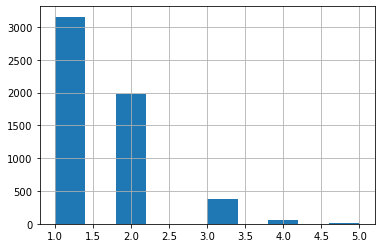

In [28]:
filled_data['classe'].hist()

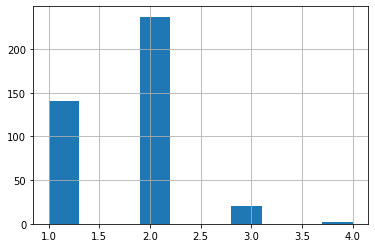

In [35]:

a = filled_data.loc[filled_data['UF'] == 'PARANÁ', 'classe'].hist()
